## 0. Knihovny

In [1]:
import numpy as np
import pandas as pd

from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn import decomposition
import matplotlib.pyplot as plt

seed = 422020

## 1. Download the dataset from the course pages (data.csv, data_description.txt). It corresponds to this Kaggle competition.

In [2]:
df = pd.read_csv('data.csv', sep = ',')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df = df.drop(['Id'], axis=1)

In [4]:
df.shape

(1460, 80)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 2. Transform features appropriately and prepare new ones - focus on the increase in the performance of the model (possibly in combination with further steps). Split the dataset into a train and test part exactly as we did in the tutorials. Use the test part for evaluation of the influence of further steps. (3 points)

- 2.1 provedu doplnění všech chybějících hodnot
- 2.2 převedu kategorické sloupce do jednotlivých ktegoriích
- 2.3 rozdělím dataset na trénovací a testovací množinu
- 2.4 vytvořemí testovací model - Lineární regresi, na kterém budu vyhodnocovat výsledky
- 2.5 převedu kategorie na uspořádané kategorie (pokud to jde)

### 2.1 Doplnění chybějících hodnot

In [7]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Tyto všechny sloupce mají nějaké chybějící hodnoty. Doplním je tedy nejvíc triviálně a to 0 / None / NA. Nejlepší by asi bylo doplnit vždy stejnou hodnotu jako má K nejbližších sousedů, ale na toto tento úkol není zaměřený.

In [8]:
fill_NA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
           'Electrical', 'FireplaceQu', 'GarageType', 'GarageCond', 'PoolQC', 'Fence', 
           'MiscFeature', 'GarageFinish', 'GarageQual']

for col in fill_NA:
    df[col] = df[col].fillna('NA')
        
fill_zero = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

for col in fill_zero:
    df[col] = df[col].fillna(0)
    
df['MasVnrType'] = df['MasVnrType'].fillna('None')


In [9]:
df.columns[df.isnull().any()]

Index([], dtype='object')

Vidíme, že imputace byla úspěšná.

### 2.2 Převod sloupců do kategorii

In [10]:
categorical_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                    'BsmtExposure', 'BsmtFinType1', 'Heating', 'BsmtFinType2', 'HeatingQC',
                    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                    'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in categorical_cols:
    df[col] = df[col].astype(CategoricalDtype(categories=df[col].unique(), ordered=False))

Úplně optimální by bylo, kdybych každému sloupci přiřadil kategorie z description. Bohužel je těch sloupců opravdu hodně a proto jsem použil pouze unique(). Je možné, že jsou zde zastoupeny všechny hodnoty a v tom případě by to bylo jedno.

### 2.3 Trénovací / Testovací

In [11]:
def train_test():
    x = df.drop(['SalePrice'], axis=1)
    y = df['SalePrice']

    train_x, test_x, train_y, test_y = train_test_split(x, y,test_size=0.4, random_state=seed)
    return train_x, test_x, train_y, test_y

### 2.4 Testovací model

In [12]:
def evaluate(train_x, train_y, test_x, test_y, method_name, print_results=True):
    LR = LinearRegression()
    LR.fit(train_x, np.log1p(train_y))
    pred = LR.predict(test_x)
    rmsle = np.sqrt(mean_squared_error(np.log1p(test_y), pred))
    if print_results:
        print('#'*30)
        print(method_name);
        print('RMSLE: {}'.format(rmsle))
        print('#'*30)
    return rmsle

### 2.5 Uspořádané kategorie

In [13]:
train_x, test_x, train_y, test_y = train_test()

In [14]:
def convert_column(column_name, values_array, start, data):
    dic = dict()
    for i, val in enumerate(reversed(range(start, len(values_array) + start))):
        dic[values_array[i]] = val

    data[column_name] = data[column_name].replace(dic)
    data[column_name] = data[column_name].astype('float64')
    
def convert_columns(data):
    convert_column('Utilities', ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], 1, data)
    convert_column('ExterQual', ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 1, data)
    convert_column('ExterCond', ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 1, data)
    convert_column('BsmtQual', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], 0, data)
    convert_column('BsmtCond', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], 0, data)
    convert_column('BsmtExposure', ['Gd', 'Av', 'Mn', 'No', 'NA'], 0, data)
    convert_column('BsmtFinType1', ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], 0, data)
    convert_column('BsmtFinType2', ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], 0, data)
    convert_column('HeatingQC', ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 1, data)
    convert_column('CentralAir', ['Y', 'N'], 0, data)
    convert_column('KitchenQual', ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 1, data)
    convert_column('Functional', ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], 1, data)
    convert_column('FireplaceQu', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], 0, data)
    convert_column('GarageFinish', ['Fin', 'RFn', 'Unf', 'NA'], 0, data)
    convert_column('GarageQual', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], 0, data)
    convert_column('GarageCond', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], 0, data)
    convert_column('PoolQC', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], 0, data)
    return pd.get_dummies(data=data, drop_first=False)
     
train_x = convert_columns(train_x)
test_x = convert_columns(test_x)

Některé hodnoty musí začínat od 1. Protože když se podíváme například na sloupec **'KitchenQual'** tak **'Po'** znamená, že kuchyně je v nehezkém stavu, ale kuchyně tam je. Proto tam vložím 1 místo 0.

In [15]:
evaluate(train_x, train_y, test_x, test_y, 'Uspořádání kategorií')

##############################
Uspořádání kategorií
RMSLE: 0.17891670608962432
##############################


0.17891670608962432

To není tak úplně špatný výsledek.

## 3. Try to find some suitable subset of features - first without the use of PCA. (4 points)

Metoda **SelectKBest** postupně vybírá nejlepší příznaky na základě svého vnitřního skórování.

In [16]:
train_x, test_x, train_y, test_y = train_test()

train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

kbest_selector = feature_selection.SelectKBest(feature_selection.mutual_info_regression, k=42)
kbest_selector.fit(train_x, train_y)

SelectKBest(k=42,
            score_func=<function mutual_info_regression at 0x0000000009B73550>)

Náš model našel nejlepší příznaky, teď si je jen odfiltrujeme a následně zkusíme predikovat pouze za pomocí těchto příznaků.

In [17]:
mask = kbest_selector.get_support()
kbest_features = []

for b, f in zip(mask, train_x.columns.values):
    if b:
        kbest_features.append(f)

In [18]:
evaluate(train_x[kbest_features], train_y, test_x[kbest_features], test_y, 'K nejlepších příznaků - SelectKBest')

##############################
K nejlepších příznaků - SelectKBest
RMSLE: 0.19721695784005291
##############################


0.19721695784005291

Dostali jsme horší úspěšnost. Nevím zda je to tím, že jsem udělal někde chybu, nebo prostě vybrání těchto příznaků zrovna nepomohlo.

## 4. Use PCA (principal component analysis) to reduce the dimensionality. Discuss the influence of the number of principal components. (4 points)

In [19]:
train_x, test_x, train_y, test_y = train_test()
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

In [20]:
pca = decomposition.PCA()
pca.fit(train_x)
trans_test_x = pca.transform(test_x)
trans_train_x = pca.transform(train_x)
error_for_component = []

for no_comp in range(1, trans_train_x.shape[1]):
    pca_train_x = trans_train_x[:, 0:no_comp]
    pca_test_x = trans_test_x[:, 0:no_comp]
    err = evaluate(pca_train_x, train_y, pca_test_x, test_y, 'PCA', False)
    error_for_component.append(err)

Text(0, 0.5, 'RMSLE')

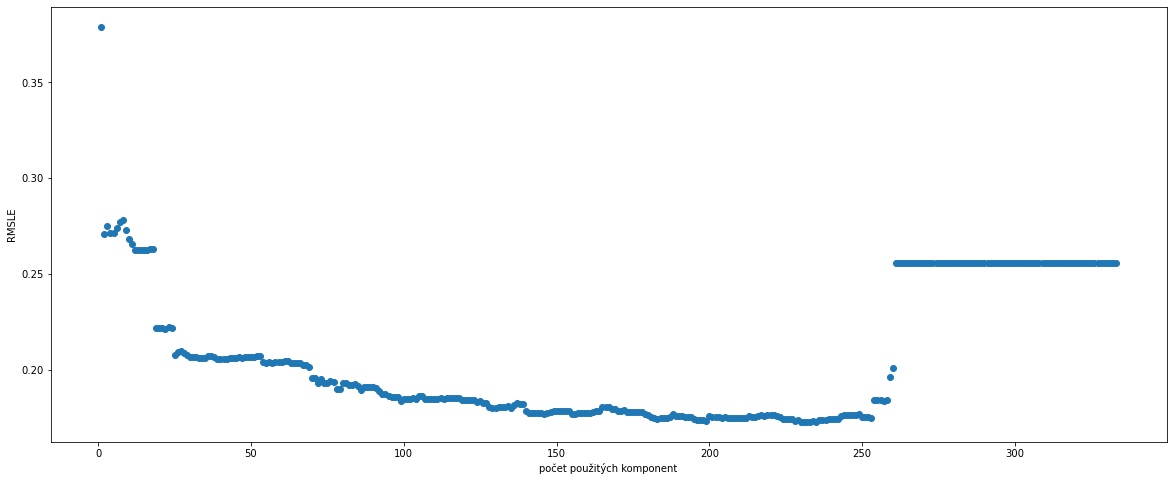

In [21]:
plt.subplots(1,1, figsize=(20, 8))
plt.scatter(range(1,trans_train_x.shape[1]), error_for_component)
plt.xlabel(u'počet použitých komponent')
plt.ylabel('RMSLE')

Jak můžeme vidět, globální minimum bude někde kolem 230 příznaků. Já osobně bych volil něco kolem 25 příznaků, kdy je to kompromis mezi chybou a velikostí dimenze. Po 20 příznaku se chyba mění minimálně. Podívejme se tedy na detailnější graf.

Text(0, 0.5, 'RMSLE')

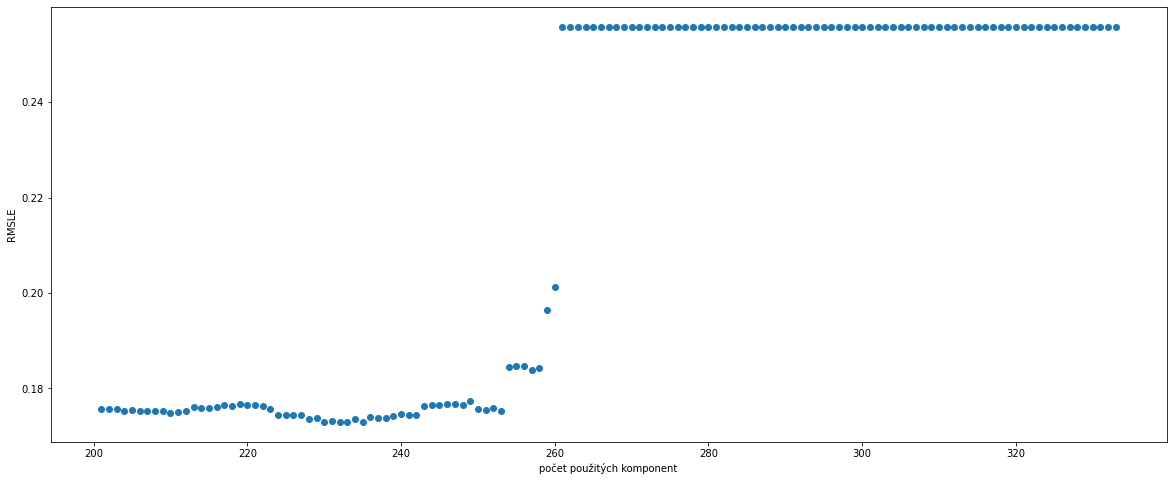

In [22]:
plt.subplots(1,1, figsize=(20, 8))
plt.scatter(range(201, trans_train_x.shape[1]), error_for_component[200:])
plt.xlabel(u'počet použitých komponent')
plt.ylabel('RMSLE')

Jak vidíme, globální minimum je opravdu 230.

Text(0, 0.5, 'RMSLE')

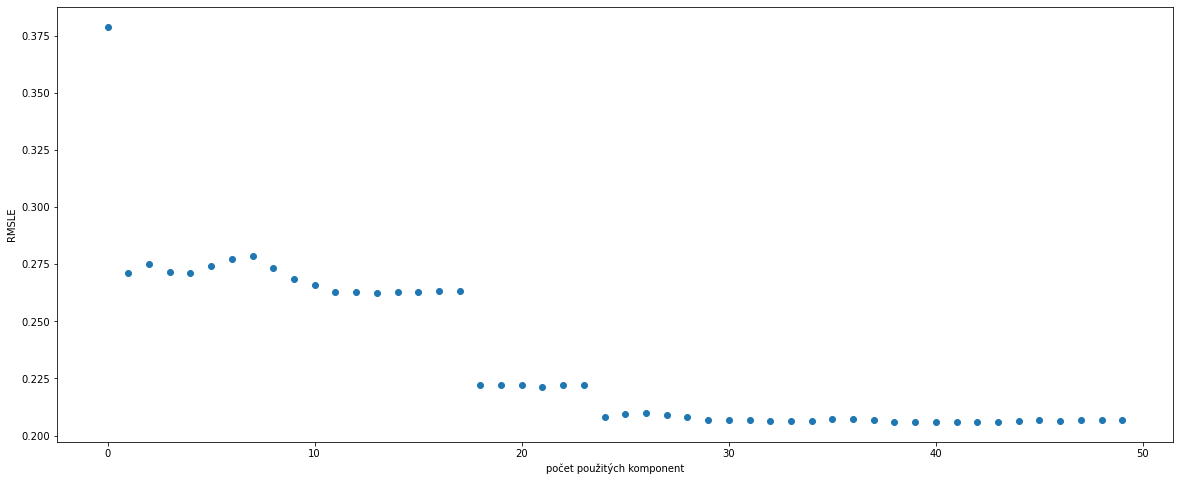

In [23]:
plt.subplots(1,1, figsize=(20, 8))
plt.scatter(range(0, 50), error_for_component[:50])
plt.xlabel(u'počet použitých komponent')
plt.ylabel('RMSLE')

Jak můžeme vidět na detailním obrázku, asi nejlepší hodnota by byla kolem 23 příznaků.

Zkusím si tedy vypsat RMSLE pro pouze 23 komponent a následně pro 230.

In [24]:
pca = decomposition.PCA()
pca.fit(train_x)
trans_test_x = pca.transform(test_x)
trans_train_x = pca.transform(train_x)
error_for_component = []

pca_train_x = trans_train_x[:, 0:23]
pca_test_x = trans_test_x[:, 0:23]
err = evaluate(pca_train_x, train_y, pca_test_x, test_y, 'PCA - 23 komponent')
error_for_component.append(err)
print()
pca_train_x = trans_train_x[:, 0:230]
pca_test_x = trans_test_x[:, 0:230]
err = evaluate(pca_train_x, train_y, pca_test_x, test_y, 'PCA - 230 komponent')
error_for_component.append(err)

##############################
PCA - 23 komponent
RMSLE: 0.22229609035277798
##############################

##############################
PCA - 230 komponent
RMSLE: 0.17297358945091015
##############################


## 5. Compare the results of previous steps on the test part of the dataset. (3 points)

1. **PCA - 230 komponent** RMSLE: 0.17297358945091015

2. **Uspořádání kategorií** RMSLE: 0.17891670608962432

3. **K nejlepších příznaků - SelectKBest** RMSLE: 0.19504322242204605

4. **PCA - 23 komponent** RMSLE: 0.22229609035277798

Jak můžeme vidět, čím méně jsem toho dělal, tím lépe to dopadlo... možná to doplnění 0 / prázdnou hodnotou nebylo nejlepší pro tyto všechny metody. Pouze PCA s globálním optimem nám lehce pomohla.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=00923e73-c51a-4992-bcbe-789188b261f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>